# SVM (Support Vector Machines)

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to Support Vector Machine to classify

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

## 1. Read the data

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
df = pd.read_csv(url)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [129]:
df.shape

(699, 11)

In [130]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [131]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [132]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [133]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

## 2. pre-process

In [164]:
#Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:
df['Clump'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

In [165]:
df['UnifSize'].unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

In [166]:
df['Class'].unique()

array([2, 4], dtype=int64)

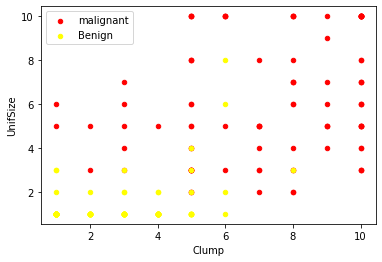

In [167]:
ax = df[df['Class'] == 4][0:99].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignant')
ax1 = df[df['Class'] == 2][0:99].plot(kind='scatter', x='Clump', y = 'UnifSize', color = 'yellow', label = 'Benign', ax = ax)
plt.show()

In [168]:
df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [169]:
len(df['BareNuc'])

699

In [170]:
df[df["BareNuc"].str.contains('4')].count()

ID             19
Clump          19
UnifSize       19
UnifShape      19
MargAdh        19
SingEpiSize    19
BareNuc        19
BlandChrom     19
NormNucl       19
Mit            19
Class          19
dtype: int64

In [171]:
# filter values contain '?'
cell_df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [172]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [173]:
cell_df['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [174]:
cell_df['BareNuc'].astype(int)

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 683, dtype: int32

### Divide predictors and response 

In [212]:
x = cell_df.drop(columns = ['ID','Class']).values
x[0:4]

array([[5, 1, 1, 1, 2, '1', 3, 1, 1],
       [5, 4, 4, 5, 7, '10', 3, 2, 1],
       [3, 1, 1, 1, 2, '2', 3, 1, 1],
       [6, 8, 8, 1, 3, '4', 3, 7, 1]], dtype=object)

In [213]:
y = cell_df['Class']
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print('train size: ', x_train.shape[0])
print('test size: ', x_test.shape[0])

train size:  546
test size:  137


## 3. Modeling and evaluation 

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [250]:
from sklearn import svm
svm = svm.SVC(kernel = 'rbf')
# Support vector classifier
svm.fit(x_train, y_train)

SVC()

In [251]:
yhat = svm.predict(x_test)
yhat[0:50]

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2], dtype=int64)

In [252]:
from sklearn.metrics import confusion_matrix
svm_matrix = confusion_matrix(y_test,yhat, labels = [2,4])
svm_matrix

array([[83,  4],
       [ 1, 49]], dtype=int64)

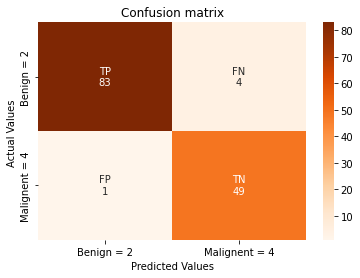

In [253]:
import seaborn as sns

text = np.array([['TP', 'FN'], ['FP','TN']])

# combining text with values
formatted_text = (np.array(["{0}\n{1:0}".format(
    text, svm_matrix) for text, svm_matrix in zip(text.flatten(), svm_matrix.flatten())])).reshape(2, 2)
# Reshape data array and text array into 1D using np.flatten().
# Then zip them together to iterate over both text and value.
# Use formatted strings to create customized new value.
# Return a reshaped array of the same size containing customized values.

ax = sns.heatmap(svm_matrix, annot = formatted_text, fmt = "", cmap='Oranges')

ax.set_title('Confusion matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign = 2','Malignent = 4'])
ax.yaxis.set_ticklabels(['Benign = 2','Malignent = 4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        87
           4       0.92      0.98      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [255]:
print('precision % .2f '%(83/(83+1)))

precision  0.99 


In [256]:
print('precision % .2f '%(83/(83+4)))

precision  0.95 


In [257]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9637150064588158

In [ ]:
"""from sklearn.svm import SVC
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train, y_train) 
yhat2 = svm2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))"""